In [86]:

!pip install nltk


from IPython import get_ipython
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [87]:

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
df1 = pd.read_excel ("Constraint_English_Train.xlsx")
df2 = pd.read_excel ("english_test_with_labels.xlsx")
df3 = pd.read_excel ("Constraint_English_Val.xlsx")

In [106]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print("Taille du dataset fusionné :", df.shape)

Taille du dataset fusionné : (10700, 3)


In [107]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   tweet   10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.9+ KB


In [109]:
# Vérification des doublons
print("Nombre de doublons:", df.duplicated().sum())

Nombre de doublons: 0


In [110]:
# Vérifier les colonnes contenant uniquement des valeurs NaN
empty_cols = df.columns[df.isnull().all()]
print("Colonnes complètement vides :", list(empty_cols))

Colonnes complètement vides : []


In [93]:
# Vérifier les valeurs uniques dans la colonne "label"
print("Valeurs uniques dans 'label' :", df["label"].unique())

Valeurs uniques dans 'label' : ['real' 'fake']


In [94]:
# Compter le nombre de fake et real news
label_counts = df["label"].value_counts()
print("\nNombre de fake et real news :\n", label_counts)


Nombre de fake et real news :
 label
real    5600
fake    5100
Name: count, dtype: int64


In [95]:
# Calculer la proportion
label_proportions = df["label"].value_counts(normalize=True) * 100
print("\nProportion de fake et real news (%) :\n", label_proportions)


Proportion de fake et real news (%) :
 label
real    52.336449
fake    47.663551
Name: proportion, dtype: float64


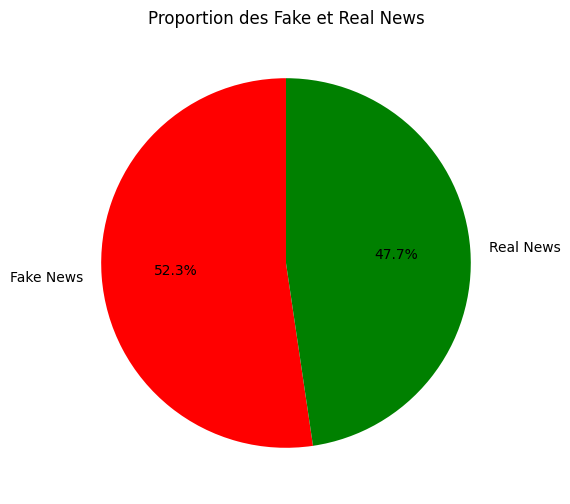

In [96]:
# Tracer le diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=["Fake News", "Real News"], autopct="%1.1f%%", colors=["red", "green"], startangle=90)
plt.title("Proportion des Fake et Real News")
plt.show()

In [97]:
# Initialisation des outils NLP
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [98]:

# Fonction de prétraitement
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Suppression des URL, mentions, hashtags et caractères spéciaux
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Garde seulement les lettres et espaces

    # Conversion en minuscules
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Suppression des stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

In [99]:
# Appliquer le prétraitement sur la colonne "tweet"
df["clean_tweet"] = df["tweet"].apply(preprocess_text)

In [100]:
# Encodage des labels : "fake" → 0, "real" → 1
df["label_encoded"] = df["label"].map({"fake": 0, "real": 1})

# Vérifier la transformation
print(df[["label", "label_encoded"]].head())

  label  label_encoded
0  real              1
1  real              1
2  fake              0
3  real              1
4  real              1


In [101]:
# Vérifier les résultats
print(df[["tweet", "clean_tweet", "label"]].head())

                                               tweet  \
0  The CDC currently reports 99031 deaths. In gen...   
1  States reported 1121 deaths a small rise from ...   
2  Politically Correct Woman (Almost) Uses Pandem...   
3  #IndiaFightsCorona: We have 1524 #COVID testin...   
4  Populous states can generate large case counts...   

                                         clean_tweet label  
0  cdc currently report death general discrepancy...  real  
1  state reported death small rise last tuesday s...  real  
2  politically correct woman almost us pandemic e...  fake  
3    testing laboratory india th august test done dg  real  
4  populous state generate large case count look ...  real  


In [102]:
# Sauvegarder le fichier prétraité
df.to_csv("Clean_Constraint_English.csv", index=False)

print("Prétraitement terminé. Fichier sauvegardé sous 'Clean_Constraint_English_Train.csv'.")

Prétraitement terminé. Fichier sauvegardé sous 'Clean_Constraint_English_Train.csv'.
